In [2]:
from pyspark import SparkContext, SparkConf
import requests
from konlpy.tag import Mecab

In [3]:
lines=sc.textFile("/home/big-edu/spark/data/hani.txt")

In [4]:
def word_tokenize(x):
    tagger=Mecab()
    t = tagger.nouns(x)
    return t

In [4]:
#text parser test
text="모바일 게임은 재밌다 열심히 해서 만랩을 찍어야지~ ㅎㅎㅎ"
list=word_tokenize(text)
print(list)

['모바일', '게임', '랩']


In [6]:
#extracting nouns from each sentences by work_tokenzie function
tokenized_list=lines.flatMap(lambda lines: word_tokenize(lines))

In [12]:
#Convert 'Noun' to 'Nouns, 1' format
pairs=tokenized_list.map(lambda s:(s,1))

In [13]:
#Reduce the data for counting the number of words
counts=pairs.reduceByKey(lambda a,b:a+b)

In [14]:
#print data (ex. x.collect())
print(counts.collect())

[('본문', 2), ('광고', 9), ('한겨레', 11), ('메뉴', 1), ('아이콘', 2), ('기타', 1), ('서비스', 4), ('로그인', 2), ('회원', 1), ('가입', 1), ('검색창', 2), ('열기', 1), ('세금', 3), ('언제', 3), ('아가씨', 3), ('타령', 3), ('건가', 3), ('일본', 30), ('대사관', 3), ('노', 3), ('아베', 16), ('수출', 12), ('규제', 7), ('규탄', 3), ('집회', 3), ('유시민', 9), ('총리', 12), ('일침', 6), ('남', 6), ('눈', 6), ('일', 17), ('추가', 3), ('보복', 4), ('시사', 4), ('청', 2), ('군사', 5), ('협정', 7), ('옵션', 3), ('검토', 5), ('기업', 5), ('스타트업', 3), ('년', 4), ('선택', 2), ('조국', 5), ('대법원', 2), ('일제', 5), ('강제', 2), ('징용', 5), ('판결', 2), ('부정', 5), ('친일파', 5), ('친일', 2), ('인사', 3), ('우익', 2), ('단체', 2), ('지도자', 2), ('미군', 2), ('통역', 2), ('변신', 2), ('우리', 10), ('공화', 4), ('광화문', 4), ('광장', 4), ('기습', 4), ('설치', 5), ('명', 4), ('연행', 4), ('도둑', 2), ('출연', 3), ('홍콩', 4), ('배우', 2), ('런', 2), ('다화', 2), ('중국', 3), ('행사', 2), ('도중', 2), ('칼', 2), ('경찰', 2), ('송', 5), ('환법', 2), ('반대', 2), ('시위', 3), ('성능', 2), ('폭발물', 2), ('적발', 2), ('추경', 3), ('정부', 6), ('허탈', 2), ('경기', 4), ('악화', 2

In [15]:
#You will display the data by sorting the number of data
#convert(word, number) to (number, word) 
#You can access each element by using array such as a[0],a[1]
transition=counts.map(lambda a: (a[1],a[0]))

In [16]:
#filter data less than '3' 
filtered=transition.filter(lambda a:a[0]>3)

In [19]:
#sort data
#you can also sorting ay ascending order by using 'ascending=False' option
words_frequency=filtered.sortByKey(ascending=False)

In [20]:
#print result
print(words_frequency.collect())

[(30, '일본'), (17, '일'), (16, '아베'), (14, '한국'), (13, '것'), (12, '수출'), (12, '총리'), (11, '한겨레'), (10, '우리'), (9, '광고'), (9, '유시민'), (9, '경제'), (8, '말'), (7, '규제'), (7, '협정'), (7, '일반'), (7, '국제'), (7, '무역'), (6, '일침'), (6, '남'), (6, '눈'), (6, '정부'), (6, '포토'), (6, '후원'), (6, '기사'), (6, '이사장'), (6, '변호사'), (6, '수'), (5, '군사'), (5, '검토'), (5, '기업'), (5, '조국'), (5, '일제'), (5, '징용'), (5, '부정'), (5, '친일파'), (5, '설치'), (5, '송'), (5, '정치'), (5, '황교안'), (5, '불매'), (5, '관련'), (5, '간'), (5, '유'), (5, '그'), (4, '서비스'), (4, '보복'), (4, '시사'), (4, '년'), (4, '공화'), (4, '광화문'), (4, '광장'), (4, '기습'), (4, '명'), (4, '연행'), (4, '홍콩'), (4, '경기'), (4, '사회'), (4, '동물'), (4, '뉴스'), (4, '사람'), (4, '제품'), (4, '공개'), (4, '레오'), (4, '제한'), (4, '행위'), (4, '자유'), (4, '신뢰'), (4, '통상'), (4, '원'), (4, '제소')]


In [21]:
def read_img_from_url_and_return_matrix(url):
    response = requests.get(url)
    #print("binary file sample: {}".format(response.content[:20]))

    from PIL import Image 
    from io import BytesIO 

    img = Image.open(BytesIO(response.content))
    img_matrix = np.array(img)
    # plt.imshow(img_matrix)
    # img.save('aaa.png')
    return img_matrix

In [22]:
from pyspark.sql.types import *
schema = StructType([StructField("word", StringType(), True),
                     StructField("frequency", IntegerType(), True)])




In [24]:
#convert data to DataFrame format
#data will be stored by 'counts_df' value
counts_df=spark.createDataFrame(counts, schema)

In [25]:
frequencies = counts_df.toPandas().set_index('word').T.to_dict('records')

In [26]:
print(frequencies)

[{'본문': 2, '광고': 9, '한겨레': 11, '메뉴': 1, '아이콘': 2, '기타': 1, '서비스': 4, '로그인': 2, '회원': 1, '가입': 1, '검색창': 2, '열기': 1, '세금': 3, '언제': 3, '아가씨': 3, '타령': 3, '건가': 3, '일본': 30, '대사관': 3, '노': 3, '아베': 16, '수출': 12, '규제': 7, '규탄': 3, '집회': 3, '유시민': 9, '총리': 12, '일침': 6, '남': 6, '눈': 6, '일': 17, '추가': 3, '보복': 4, '시사': 4, '청': 2, '군사': 5, '협정': 7, '옵션': 3, '검토': 5, '기업': 5, '스타트업': 3, '년': 4, '선택': 2, '조국': 5, '대법원': 2, '일제': 5, '강제': 2, '징용': 5, '판결': 2, '부정': 5, '친일파': 5, '친일': 2, '인사': 3, '우익': 2, '단체': 2, '지도자': 2, '미군': 2, '통역': 2, '변신': 2, '우리': 10, '공화': 4, '광화문': 4, '광장': 4, '기습': 4, '설치': 5, '명': 4, '연행': 4, '도둑': 2, '출연': 3, '홍콩': 4, '배우': 2, '런': 2, '다화': 2, '중국': 3, '행사': 2, '도중': 2, '칼': 2, '경찰': 2, '송': 5, '환법': 2, '반대': 2, '시위': 3, '성능': 2, '폭발물': 2, '적발': 2, '추경': 3, '정부': 6, '허탈': 2, '경기': 4, '악화': 2, '실탄': 2, '태풍': 2, '나스': 2, '부산': 2, '전체': 2, '정치': 5, '일반': 7, '청와대': 3, '국회': 3, '정당': 2, '행정': 1, '자치': 1, '국방': 1, '북한': 1, '외교': 1, '사회': 4, '여성': 1, '노동': 1, '환경': 2, '장애'

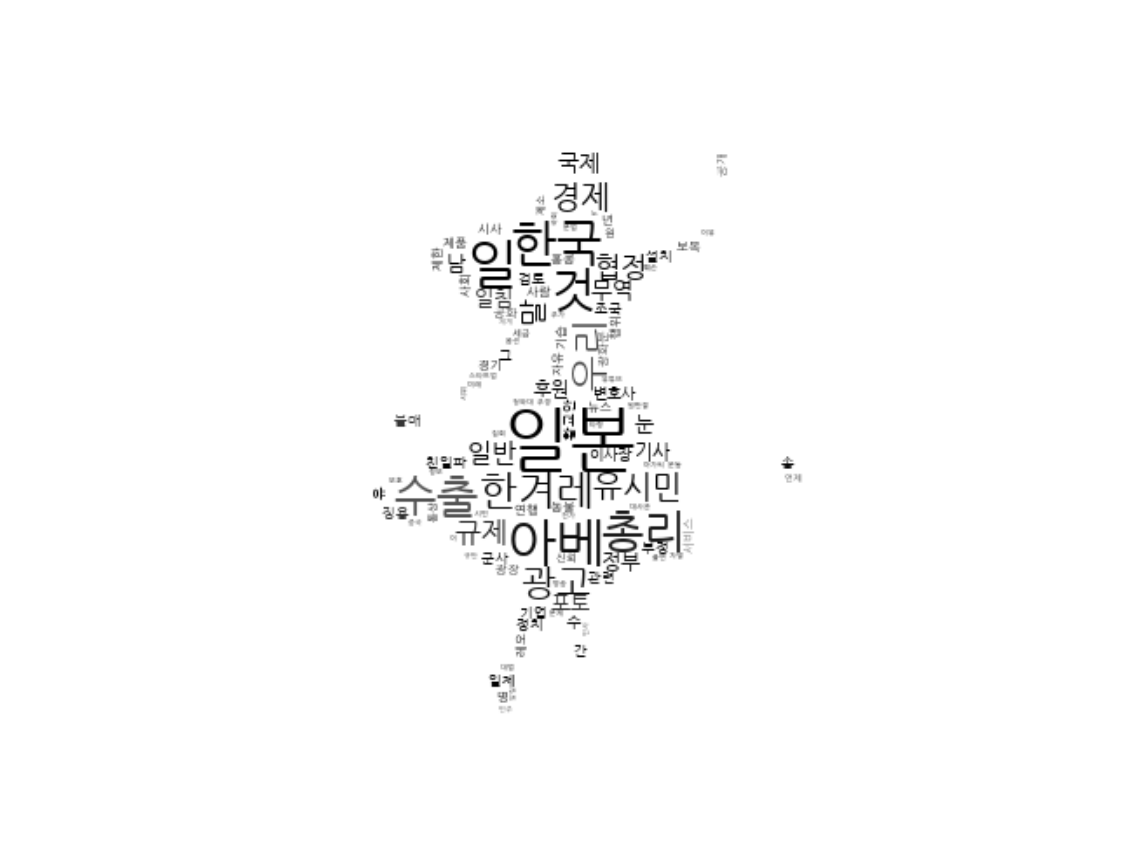

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

def make_ImageColoredWordcloud2(keywords, img_matrix, outputfile_name):
    wc = WordCloud(font_path='/home/big-edu/Downloads/NanumGothic.ttf', background_color="white", max_words=2000, mask=img_matrix, max_font_size=40, random_state=42)
    # generate word cloud
    wc.generate_from_frequencies(keywords)
    f = plt.figure(figsize=(20, 20))
    plt.imshow(wc.recolor(color_func=ImageColorGenerator(img_matrix)), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(outputfile_name)
    
url = "https://amueller.github.io/word_cloud/_images/sphx_glr_masked_002.png"
#url = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530033379/wine_mask_xgk1tq.png"
img_matrix = read_img_from_url_and_return_matrix(url)
stopwords = set(STOPWORDS)
make_ImageColoredWordcloud2(dict(*frequencies), img_matrix, '/home/big-edu/spark/SPARK_EDU_EXAMPLE/assets'+'coloredWordCloud2.svg')